Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

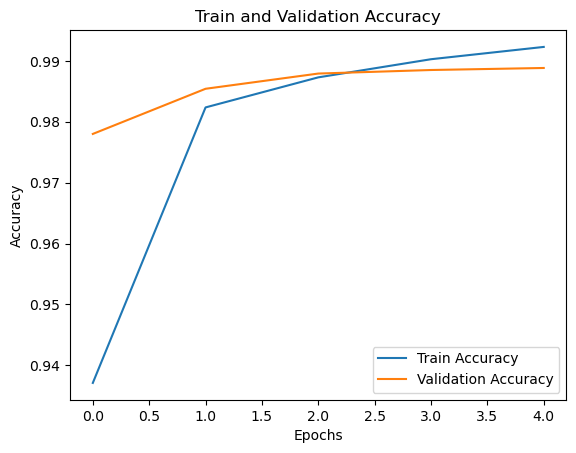

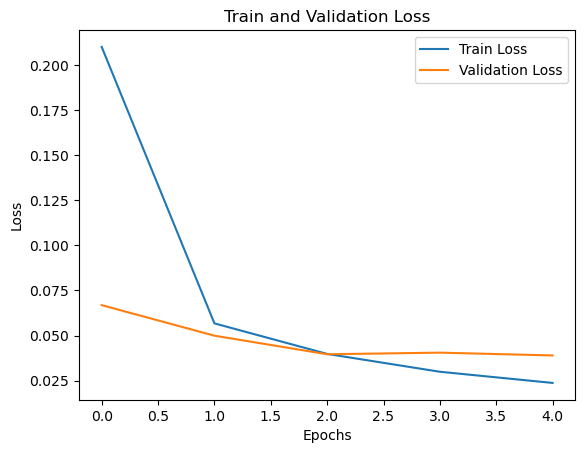

313/313 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9909
Test loss: 0.0296
Test accuracy: 0.9909
1/1 [==============================] - 0s 34ms/step
Predictions: [7 2 1 0 4]
True labels: [7 2 1 0 4]


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN)
# 1 - single channel for grayscale images, 3 - three channels for RGB images
# MNIST contains grayscale images thus, channel dimension is 1
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
# 60000 represents the number of training images
# 10000 represents the number of test images

# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#categorical_crossentropy' is commonly used for multiclass classification problems;
#each example can belong to one and only one class
#For the classification task, metric accuracy is used
#Optimizer is adam, sgd, adamW, Nadam and others can also be used


# Display the model's architecture
model.summary()

# Train the model
history=model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)


# Plot the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()
plt.show()


# Plot the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.show()



# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')


# Evaluate the model on the test set
#test_loss, test_acc = model.evaluate(test_images, test_labels)
#print(f'Test accuracy: {test_acc}')

# Make predictions using the first 5 images of the test data (new data)
predictions = model.predict(test_images[:5])
#First show predicted class labels
#argmax function is used to find the index of the maximum value using softmax layer
print('Predictions:', predictions.argmax(axis=1))
#Then show the true lables
print('True labels:', test_labels[:5].argmax(axis=1))

In [4]:
import numpy as np
from sklearn.metrics import classification_report

# Make predictions on the test set
predictions = model.predict(test_images)

# Convert one-hot encoded labels to class labels
true_labels = test_labels.argmax(axis=1)
predicted_labels = predictions.argmax(axis=1)

# Calculate precision, recall, and F-score
report = classification_report(true_labels, predicted_labels, target_names=[str(i) for i in range(10)])
print(report)



313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

